In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mms

In [2]:
df=pd.read_csv("Complete.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.750,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.260,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.749,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.103,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.643,45.749,46.447,10971066,qqq


,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.7500,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.2600,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.7490,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.1030,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.6430,45.749,46.447,10971066,qqq
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


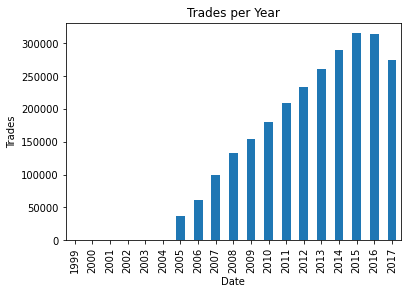

In [3]:
df.Date=pd.to_datetime(df.Date)
plt.title("Trades per Year")
plt.ylabel("Trades")
df["Ticker"].groupby(df["Date"].dt.year).count().plot(kind="bar")
df

In [4]:
# declaring the time range of the data
begin=2007
end=2017
firstYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==begin]
lastYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==end]

# filtering down to tickers that existed before 'begin' and are still there when it is 'end'
fYStock=firstYearDf.Ticker.unique().tolist()
lYStock=lastYearDf.Ticker.unique().tolist()
tickers=[i for i in fYStock if i in lYStock]
print(len(tickers))
print(tickers)

482
['iyz', 'ijt', 'xlk', 'fmy', 'xle', 'def', 'jkl', 'ige', 'fvl', 'xsd', 'mfd', 'fpx', 'xop', 'mdyg', 'vox', 'ixp', 'ewa', 'iwn', 'xli', 'vdc', 'mxi', 'ixg', 'qld', 'pwv', 'ixn', 'dhs', 'fdm', 'fxc', 'ewk', 'iyf', 'itb', 'oef', 'mdy', 'fez', 'pxq', 'pzd', 'doo', 'jkh', 'fxb', 'spyg', 'eem', 'pzi', 'jkg', 'dbc', 'sso', 'rye', 'ewc', 'rpg', 'pbe', 'ijk', 'xes', 'tlt', 'dfj', 'iye', 'vaw', 'ryt', 'vbk', 'vgt', 'dnl', 'gdx', 'ffa', 'ryj', 'kxi', 'kie', 'dth', 'xlb', 'iyw', 'ive', 'xlu', 'rfg', 'slyg', 'vwo', 'pbs', 'psp', 'dbv', 'ihf', 'vgk', 'vpu', 'pph', 'voe', 'iyc', 'qqew', 'dia', 'rgi', 'ewd', 'don', 'myy', 'xph', 'fxs', 'iwv', 'iyk', 'oneq', 'xlv', 'iwc', 'rtm', 'icf', 'jkj', 'ief', 'fxf', 'sphq', 'spy', 'dln', 'iyr', 'rpv', 'iez', 'vig', 'fxa', 'dxj', 'ivw', 'jkk', 'rzv', 'jkf', 'fct', 'pwc', 'dvy', 'ewi', 'efv', 'ewu', 'smh', 'vde', 'slyv', 'slv', 'iyh', 'mzz', 'xlp', 'pmr', 'ewg', 'gld', 'fxi', 'qtec', 'ixj', 'iai', 'iwr', 'efg', 'pjp', 'pey', 'spyv', 'ewj', 'feo', 'cvy', 'dwm',

In [5]:
dateHist=[]
tickHist=[]

tlDate=df[["Ticker","Date"]].loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end) & (df.Ticker.isin(tickers))]
tlDate

dates=np.array(tlDate.Date.unique(),dtype="datetime64[D]")
for d in dates:
    dateHist.append([len(tlDate.loc[tlDate.Date == d]),d])

for t in tickers:
    tickHist.append([len(tlDate.loc[tlDate.Ticker==t]),t])

In [6]:
tickHist.sort(reverse=True)
print(tickHist)

[[2736, 'spyg'], [2736, 'soxx'], [2736, 'slyv'], [2736, 'qqq'], [2735, 'xrt'], [2735, 'xop'], [2735, 'xme'], [2735, 'xly'], [2735, 'xlv'], [2735, 'xlu'], [2735, 'xlp'], [2735, 'xlk'], [2735, 'xli'], [2735, 'xlg'], [2735, 'xlf'], [2735, 'xle'], [2735, 'xlb'], [2735, 'xhb'], [2735, 'xes'], [2735, 'xbi'], [2735, 'vym'], [2735, 'vxf'], [2735, 'vwo'], [2735, 'vv'], [2735, 'vug'], [2735, 'vtv'], [2735, 'vti'], [2735, 'vpu'], [2735, 'vpl'], [2735, 'vox'], [2735, 'vot'], [2735, 'voe'], [2735, 'vo'], [2735, 'vnq'], [2735, 'vis'], [2735, 'vig'], [2735, 'vht'], [2735, 'vgt'], [2735, 'vgk'], [2735, 'vfh'], [2735, 'vde'], [2735, 'vdc'], [2735, 'vcr'], [2735, 'vbr'], [2735, 'vbk'], [2735, 'vb'], [2735, 'vaw'], [2735, 'uso'], [2735, 'tlt'], [2735, 'tip'], [2735, 'sso'], [2735, 'spy'], [2735, 'sphq'], [2735, 'smh'], [2735, 'slx'], [2735, 'slv'], [2735, 'shy'], [2735, 'sh'], [2735, 'sdy'], [2735, 'sds'], [2735, 'rzv'], [2735, 'ryj'], [2735, 'rwx'], [2735, 'rwr'], [2735, 'rth'], [2735, 'rsp'], [2735, 'q

In [7]:
tickers=['spyg','soxx','slyv','qqq']
finalDf=df.loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end) & (df.Ticker.isin(tickers))]
finalDf

,Date,Open,High,Low,Close,Volume,Ticker
100481,2007-01-03,12.060,12.081,11.894,11.958,127440,spyg
100562,2007-01-03,56.656,56.749,55.948,56.268,8984,slyv
100590,2007-01-03,56.742,57.225,55.405,55.947,184619,soxx
100696,2007-01-03,39.505,40.051,38.650,39.306,184477347,qqq
100783,2007-01-04,11.950,12.047,11.950,12.044,66388,spyg
...,...,...,...,...,...,...,...
2564116,2017-11-09,177.350,177.350,173.171,175.320,1100805,soxx
2564694,2017-11-10,175.930,176.590,175.430,176.440,388830,soxx
2564729,2017-11-10,153.360,153.800,153.060,153.680,20138114,qqq
2565025,2017-11-10,32.230,32.299,32.170,32.280,176856,spyg


In [8]:
### setting up the time range, no weekends
idx=pd.date_range("2007-01-03","2017-11-10",freq='B')

### filling in the missing data
spyDf=finalDf.loc[finalDf.Ticker=="spyg"].set_index("Date")
slyDf=finalDf.loc[finalDf.Ticker=="slyv"].set_index("Date")
soxDf=finalDf.loc[finalDf.Ticker=="soxx"].set_index("Date")
qqqDf=finalDf.loc[finalDf.Ticker=="qqq"].set_index("Date")

spyDf=spyDf.reindex(idx,method='bfill')
slyDf=slyDf.reindex(idx,method='bfill')
soxDf=soxDf.reindex(idx,method='bfill')
qqqDf=qqqDf.reindex(idx,method='bfill')

In [11]:
l=[spyDf,slyDf,soxDf,qqqDf]
hDf=pd.concat(l)
features=['Open','High','Low','Close','Volume']
scaler=mms()
scaler.fit(qqqDf[features])
cDf=pd.DataFrame()
for i in l:
    stockinfo=i[features]
    stockinfo[features]=scaler.transform(stockinfo[features])
    cDf=pd.concat([cDf,stockinfo],axis=1)
cDf

/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/victor/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/victor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume,Open,High,Low,Close,Volume
2007-01-03,-0.090041,-0.094491,-0.084121,-0.086905,-0.009890,0.252897,0.248686,0.252867,0.250942,-0.010067,0.253558,0.252343,0.248713,0.248494,-0.009804,0.121008,0.120398,0.120547,0.121613,0.265755
2007-01-04,-0.090887,-0.094753,-0.083692,-0.086250,-0.009981,0.249544,0.245821,0.252155,0.251765,-0.010074,0.247445,0.252274,0.252163,0.256851,-0.009830,0.119878,0.121420,0.124930,0.127285,0.215039
2007-01-05,-0.090395,-0.095006,-0.083899,-0.086753,-0.009980,0.246861,0.241941,0.248223,0.244667,-0.010072,0.248376,0.246896,0.249554,0.248570,-0.009949,0.124445,0.119637,0.127240,0.125837,0.218488
2007-01-08,-0.090956,-0.094922,-0.083761,-0.086478,-0.009924,0.242039,0.238476,0.247107,0.244476,-0.010065,0.247745,0.247680,0.251451,0.250248,-0.009934,0.124038,0.120821,0.128372,0.126066,0.164931
2007-01-09,-0.090625,-0.094883,-0.083708,-0.086585,-0.009719,0.243093,0.239659,0.247061,0.245269,-0.010077,0.250990,0.248049,0.252446,0.251811,-0.009848,0.124868,0.122011,0.128281,0.127560,0.189904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,0.065141,0.061156,0.071514,0.068423,-0.009799,0.784760,0.784957,0.787346,0.783994,-0.010034,1.183788,1.184619,1.174560,1.182838,-0.008556,0.994771,0.994699,0.996022,0.994205,0.032812
2017-11-07,0.065987,0.061455,0.071695,0.068484,-0.009779,0.779762,0.776199,0.776331,0.773625,-0.009990,1.183865,1.184081,1.179914,1.181619,-0.009433,0.998923,0.996481,0.997858,0.995120,0.021746
2017-11-08,0.065910,0.062001,0.071966,0.069110,-0.009813,0.773994,0.776659,0.772277,0.776903,-0.009920,1.187249,1.188307,1.182362,1.185965,-0.009480,1.000000,1.000000,1.000000,1.000000,0.015827
2017-11-09,0.065218,0.060779,0.069983,0.067966,-0.009805,0.773225,0.777305,0.773577,0.775607,-0.009993,1.181020,1.175246,1.149554,1.158668,-0.008434,0.995771,0.994084,0.988449,0.993748,0.050559


In [12]:
cDf.to_csv('CleanData.csv',index=False)
hDf.to_csv('CleanDataHuman.csv',index=False)